# FreeCodeCamp - Data analysis with Python
## Prjoect 4 : Page View Time Series Visualizer

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [71]:
# Import data (Make sure to parse dates. Consider setting index column to 'date'.
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=True, index_col='date')
df.head()

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


In [73]:
# Clean data
df = df.loc[(df['value'] >= df['value'].quantile(0.025)) & 
            (df['value'] <= df['value'].quantile(0.975))]
df.head()

,value
date,
2016-05-19,19736
2016-05-26,18060
2016-05-27,19997
2016-05-28,19044
2016-05-29,20325


In [74]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1238 entries, 2016-05-19 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1238 non-null   int64
dtypes: int64(1)
memory usage: 19.3 KB


<AxesSubplot:title={'center':'Daily FreeCodeCamp Forum Page Views 5/2016-12/2019'}, xlabel='Date', ylabel='Page Views'>

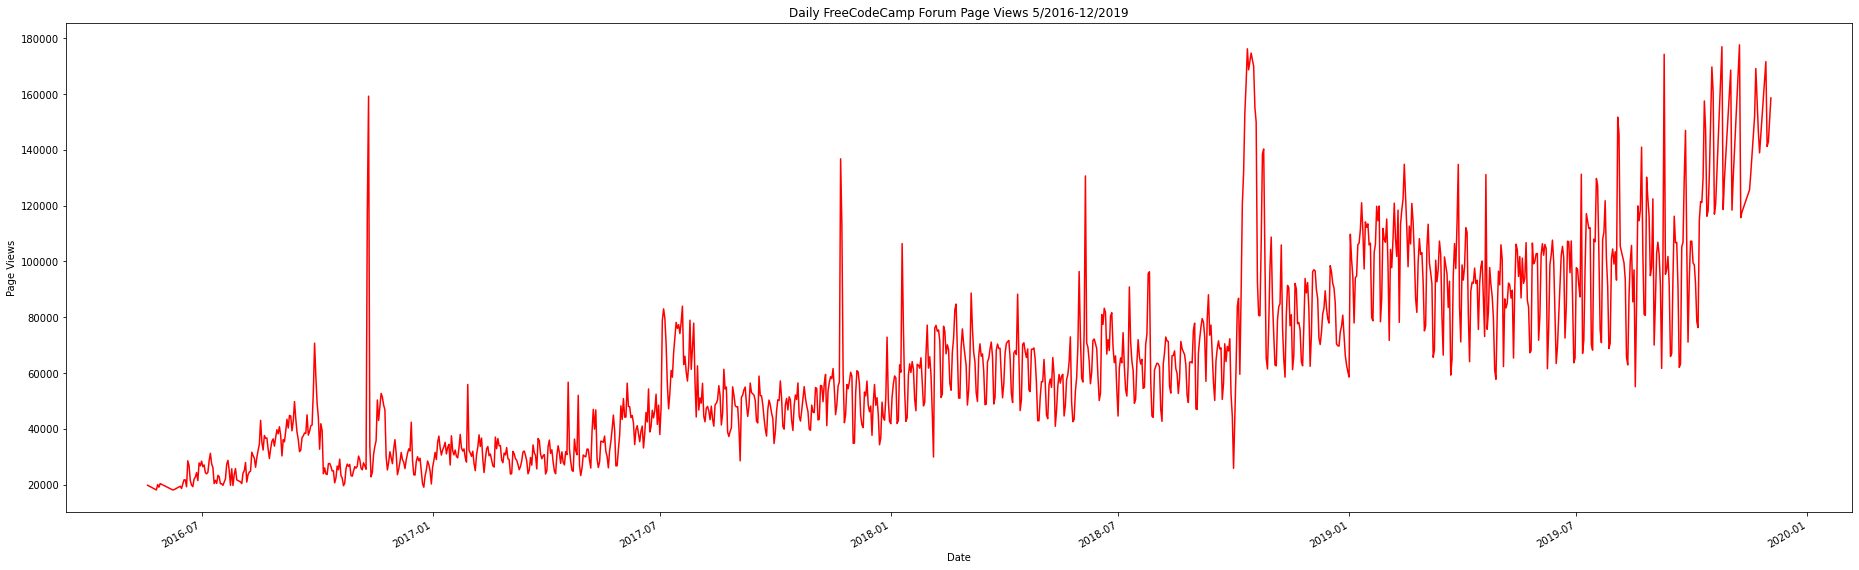

In [77]:
# Draw line plot
fig, ax = plt.subplots(figsize=(32, 10))

df.plot(ax=ax, title='Daily FreeCodeCamp Forum Page Views 5/2016-12/2019',
            xlabel='Date', ylabel='Page Views', color='r', legend=False)

In [78]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar['Month'] = df_bar.index.month
df_bar['Year'] = df_bar.index.year
df_bar = df_bar.groupby(['Year', 'Month'])['value'].mean()
df_bar = df_bar.unstack()
df_bar.head()

Month,1,2,3,4,5,6,7,8,9,10,11,12
Year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,19432.400000,21875.105263,24109.678571,31049.193548,41476.866667,27398.322581,40448.633333,27832.419355
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,111378.142857,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,102717.310345,97268.833333,122802.272727,143166.428571,150733.500000


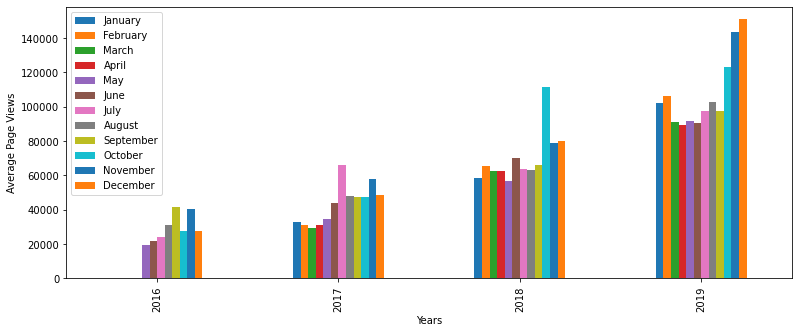

In [80]:
# Draw bar plot
fig, ax = plt.subplots(figsize=(13, 5))
df_bar.plot.bar(ax=ax, ylabel='Average Page Views', xlabel='Years')
plt.legend(['January', 'February', 'March', 'April', 'May', 'June', 
            'July', 'August', 'September', 'October', 'November', 'December'])

In [81]:
# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box.head()

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May


Text(0.5, 1.0, 'Month-wise Box Plot(Seasonality)')

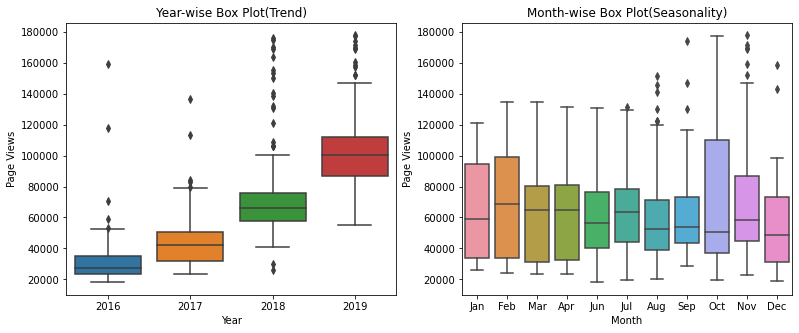

In [109]:
# Draw boxplot
fig, ax = plt.subplots(1, 2, figsize=(13, 5))
b1 = sns.boxplot(ax=ax[0], x=df_box['year'], y=df_box['value'])
b1.set_xlabel('Year')
b1.set_ylabel('Page Views')
b1.set_title('Year-wise Box Plot(Trend)')
b2 = sns.boxplot(ax=ax[1], x=df_box['month'], y=df_box['value'],
                 order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug',
                        'Sep', 'Oct', 'Nov', 'Dec'])
b2.set_xlabel('Month')
b2.set_ylabel('Page Views')
b2.set_title('Month-wise Box Plot(Seasonality)')